In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
import os
def load(fname):
    files_dir = ''
    path_to_file = os.path.join(files_dir, fname)
    with open(path_to_file, 'r') as f:
          return json.load(f)[0]

In [3]:
def print_acc(log):
    numberOfUsers = log['config']['numberOfUsers']
    testAcc = log['log']['testAccuracy']
    print('Users {}, test accuracy: {}'.format(numberOfUsers, testAcc))

In [4]:
def plot_federatedLog(logs, measure, xaxis = 'epochs'):
    
    for i, log in enumerate(logs):
        plt.plot(log[xaxis], log[measure], label='Users: {}'.format(i+1))
    
    plt.xlabel(xaxis)
    plt.ylabel(measure)
    plt.legend(loc="upper left")

In [5]:
def experiment_average_of_measure(logs, measure):
    x = np.asarray(logs[0]['log'][measure])
    for log in logs[1:]:
        x += np.asarray(log['log'][measure])      
    return x  / len(logs)

def experiment_average(logs):
    measures = ['trainAccuracy', 'testAccuracy']
    log = logs[0]
    for m in measures:
        log['log'][m] = experiment_average_of_measure(logs, m)
    return log

In [6]:
localFile = './simple_face_1users.csv'
fedFile = './simple_face_2users.csv'
files = [localFile, fedFile]

In [7]:
allLogs = list(map(load, files))

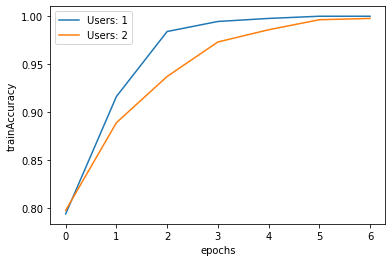

In [8]:
plot_federatedLog(allLogs, 'trainAccuracy')

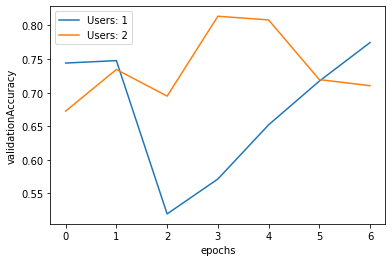

In [9]:
plot_federatedLog(allLogs, 'validationAccuracy')